<a href="https://colab.research.google.com/github/Abdul2611/Ev_Analytics_India/blob/main/Ev_Analytics_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:

yearly = pd.read_csv("/content/RS_Session_265_AU_1355_A_and_B.csv")
statewise = pd.read_csv("/content/RS_Session_259_AU_3475_1.csv")
category = pd.read_csv("/content/RS_Session_260_AU_1872_A_and_B.csv")
trend = pd.read_csv("/content/EV_India_Trend_2015_2024.csv")


datasets = {
    "Year-wise": yearly,
    "State-wise": statewise,
    "Category-wise": category,
    "EV Trend": trend
}

for name, df in datasets.items():
    print(f"\n {name} Dataset:")
    print(df.info())
    print(df.head(3))


 Year-wise Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Year                                    5 non-null      object
 1   Number of Registered Electric Vehicles  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes
None
      Year  Number of Registered Electric Vehicles
0  2019-20                                  173604
1  2020-21                                  142383
2  2021-22                                  459058

 State-wise Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   S. No.                  35 non-null     object
 1   State Name              35 non-null     object
 2   Electr

In [54]:
for name, df in datasets.items():
    print(f"\n{name} Missing Values:\n", df.isnull().sum())


Year-wise Missing Values:
 Year                                      0
Number of Registered Electric Vehicles    0
dtype: int64

State-wise Missing Values:
 S. No.                    0
State Name                0
Electric Vehicle Count    0
dtype: int64

Category-wise Missing Values:
 Sl. No.                           0
Vehicle Category                  0
2018 - Total                      0
2018 - EV                         0
2018 - %                          0
2019 - Total                      0
2019 - EV                         0
2019 - %                          0
2020 - Total                      0
2020 - EV                         0
2020 - %                          0
2021 - Total                      0
2021 - EV                         0
2021 - %                          0
2022 - Total                      0
2022 - EV                         0
2022 - %                          0
2023 (Till 01-08-2023) - Total    0
2023 (Till 01-08-2023) - EV       0
2023 (Till 01-08-2023) - %   

In [55]:
for name, df in datasets.items():
    print(f"\n{name} Dataset Summary:\n", df.describe())


Year-wise Dataset Summary:
        Number of Registered Electric Vehicles
count                            5.000000e+00
mean                             7.279026e+05
std                              6.779415e+05
min                              1.423830e+05
25%                              1.736040e+05
50%                              4.590580e+05
75%                              1.183341e+06
max                              1.681127e+06

State-wise Dataset Summary:
        Electric Vehicle Count
count            3.500000e+01
mean             1.240258e+05
std              3.682412e+05
min              2.100000e+01
25%              1.464500e+03
50%              4.051600e+04
75%              9.708250e+04
max              2.170451e+06

Category-wise Dataset Summary:
         Sl. No.  2018 - Total     2018 - EV   2018 - %  2019 - Total  \
count  5.000000  5.000000e+00       5.00000   5.000000  5.000000e+00   
mean   3.000000  4.861139e+06   25791.00000   2.930000  4.622806e+06   
std    1

In [56]:
total_ev = yearly["Number of Registered Electric Vehicles"].sum()
growth = ((yearly["Number of Registered Electric Vehicles"].iloc[-1] - yearly["Number of Registered Electric Vehicles"].iloc[0]) /
          yearly["Number of Registered Electric Vehicles"].iloc[0]) * 100

print(f"Total EVs Registered: {total_ev:,}")
print(f"Growth since {yearly['Year'].iloc[0]}: {growth:.2f}%")

Total EVs Registered: 3,639,513
Growth since 2019-20: 868.37%


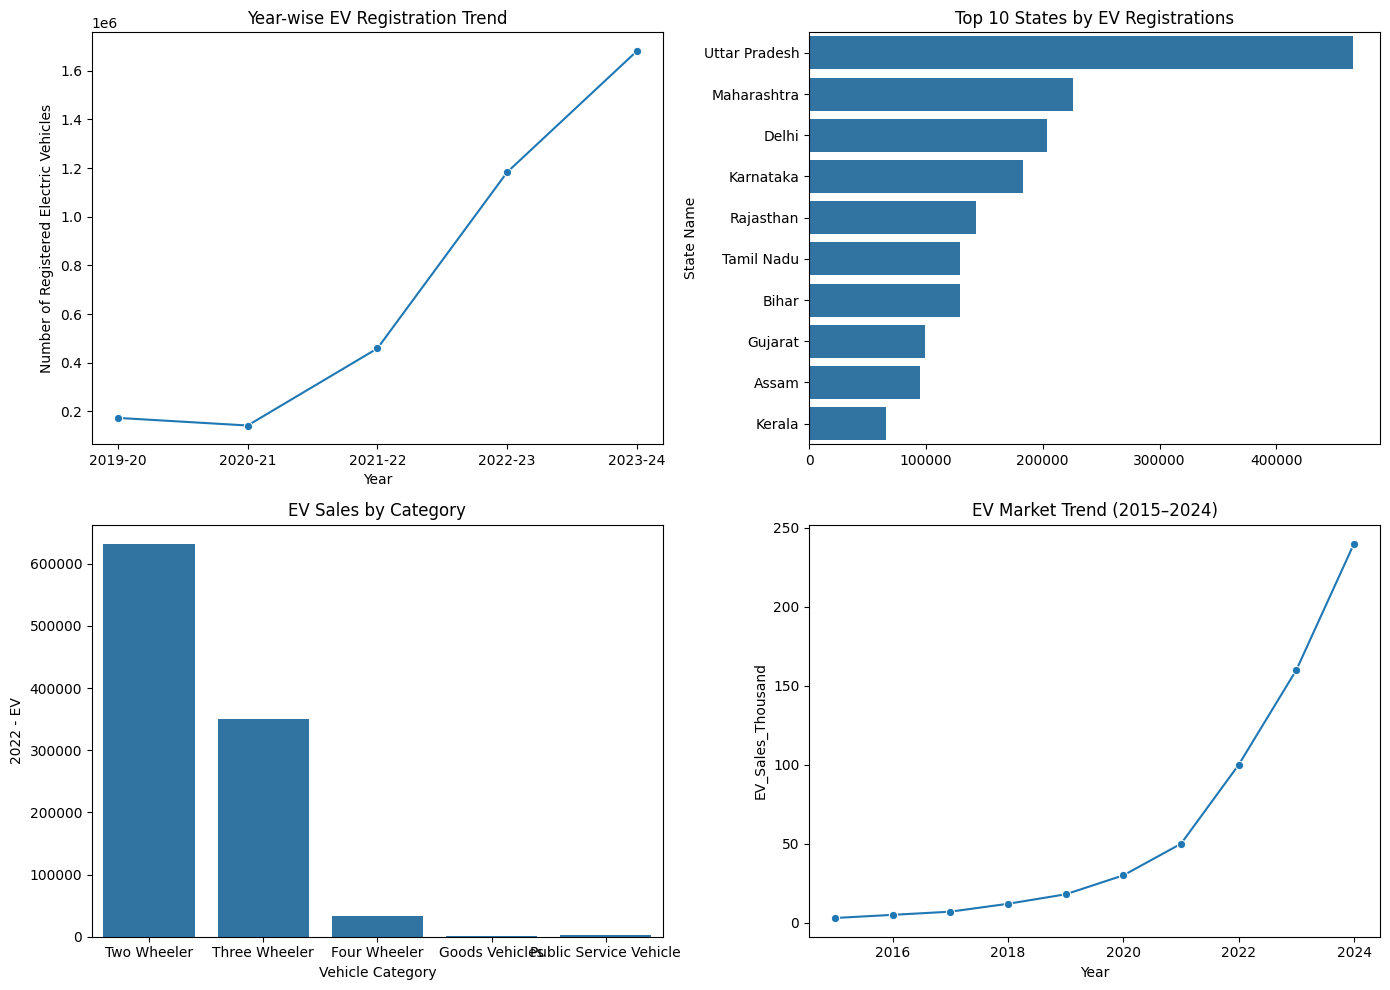

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.lineplot(ax=axes[0,0], data=yearly, x='Year', y='Number of Registered Electric Vehicles', marker='o')
axes[0,0].set_title('Year-wise EV Registration Trend')

# Remove 'Grand Total' row
statewise = statewise[statewise['State Name'].str.lower() != 'grand total']

top_states = statewise.groupby('State Name')['Electric Vehicle Count'].sum().nlargest(10)
sns.barplot(ax=axes[0,1], x=top_states.values, y=top_states.index)
axes[0,1].set_title('Top 10 States by EV Registrations')

sns.barplot(ax=axes[1,0], data=category, x='Vehicle Category', y='2022 - EV')
axes[1,0].set_title('EV Sales by Category')

sns.lineplot(ax=axes[1,1], data=trend, x='Year', y='EV_Sales_Thousand', marker='o')
axes[1,1].set_title('EV Market Trend (2015–2024)')

plt.tight_layout()
plt.show()

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fuel_price = pd.read_csv("/content/fuel_price_trend.csv")

In [59]:
merged_df = pd.merge(trend, fuel_price, on='Year')
merged_df.head()

,Year,Petrol_Price_₹/L,Diesel_Price_₹/L,EV_Sales_Thousand,Charging_Stations,Average_EV_Range_km,Petrol_Price,Diesel_Price
0,2015,63,52,3,120,100,63.0,50.0
1,2016,64,52,5,200,120,64.2,52.1
2,2017,66,55,7,300,130,68.0,55.3
3,2018,72,63,12,600,150,75.0,63.8
4,2019,74,65,18,950,160,73.2,65.0


In [69]:
corr = merged_df[['EV_Sales_Thousand','Petrol_Price_₹/L','Diesel_Price_₹/L','Charging_Stations']].corr()
print(corr)

                   EV_Sales_Thousand  Petrol_Price_₹/L  Diesel_Price_₹/L  \
EV_Sales_Thousand           1.000000          0.908547          0.881142   
Petrol_Price_₹/L            0.908547          1.000000          0.996793   
Diesel_Price_₹/L            0.881142          0.996793          1.000000   
Charging_Stations           0.995271          0.939511          0.916186   

                   Charging_Stations  
EV_Sales_Thousand           0.995271  
Petrol_Price_₹/L            0.939511  
Diesel_Price_₹/L            0.916186  
Charging_Stations           1.000000  


<Axes: >

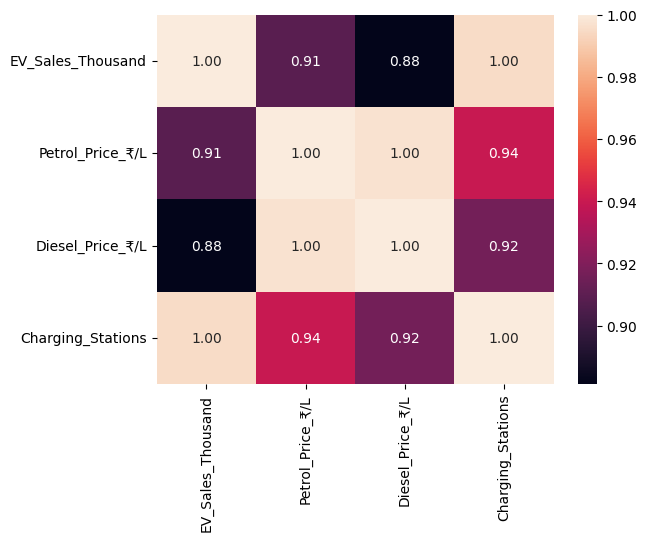

In [71]:
sns.heatmap(corr, annot=True, fmt=".2f")

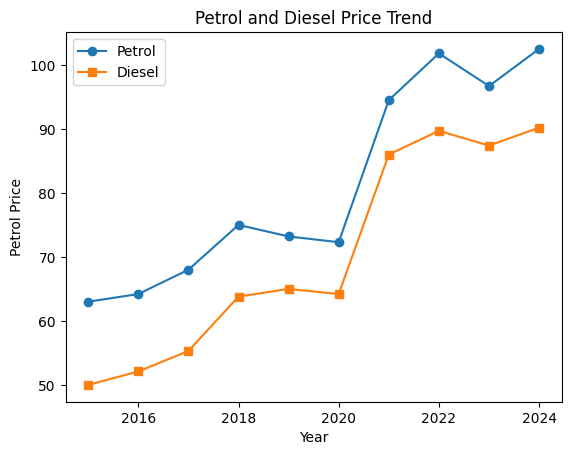

In [62]:
plt.plot(fuel_price['Year'], fuel_price['Petrol_Price'], label='Petrol', marker='o')
plt.plot(fuel_price['Year'], fuel_price['Diesel_Price'], label='Diesel', marker='s')
plt.title('Petrol and Diesel Price Trend')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Petrol Price')
plt.show()

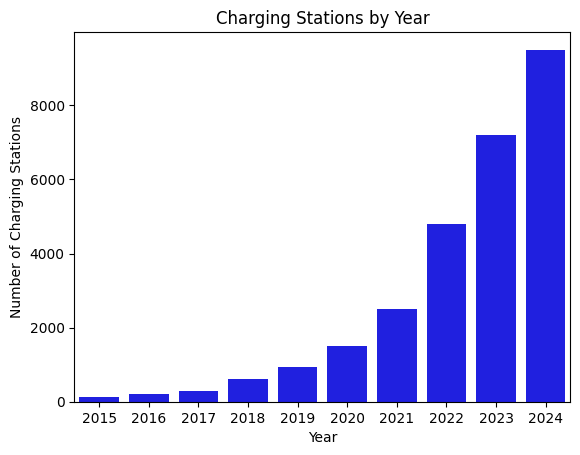

In [63]:
sns.barplot(x='Year', y='Charging_Stations', data=trend, color='blue')
plt.title('Charging Stations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Charging Stations')
plt.show()

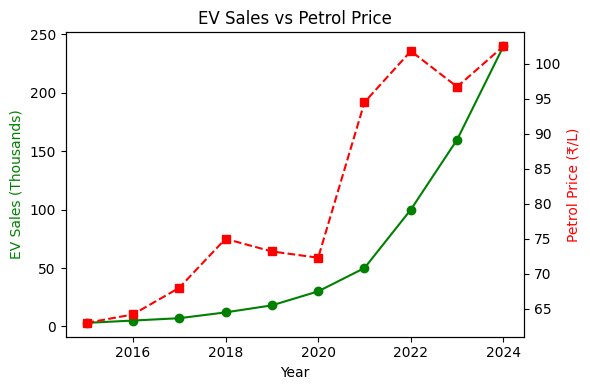

In [73]:
fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(merged_df['Year'], merged_df['EV_Sales_Thousand'], 'g-o', label='EV Sales')
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['Petrol_Price'], 'r--s', label='Petrol Price')

ax1.set_xlabel('Year')
ax1.set_ylabel('EV Sales (Thousands)', color='g')
ax2.set_ylabel('Petrol Price (₹/L)', color='r')
plt.title('EV Sales vs Petrol Price')

fig.tight_layout()
plt.show()